<a href="https://colab.research.google.com/github/Myavuzars/Image-Classifications-w-TensorFlow/blob/main/Bean_Image_Classifications_%20LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import PIL
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow_datasets as tfds
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Is there an easy way to create a path below?

In [ ]:
path =       '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN'
train_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/train'
valid_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation'
test_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test'


In [ ]:
# How can I get the total number of each type by using os.walk? You will see two cells below my ugly way..
# Can we plot a histogram that shows number of images per type? 

In [ ]:
for dir, dirnames, filenames in os.walk(path):
  print('Path:', dir)
  print('Folder Names',dirnames)
  print(len(filenames))

Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN
Folder Names ['test', 'validation', 'train']
0
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test
Folder Names ['angular_leaf_spot', 'bean_rust', 'healthy']
0
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test/angular_leaf_spot
Folder Names []
43
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test/bean_rust
Folder Names []
43
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test/healthy
Folder Names []
42
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation
Folder Names ['healthy', 'angular_leaf_spot', 'bean_rust']
0
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation/healthy
Folder Names []
44
Path: /content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation/angular_leaf_spot
Folder Names []
44
Path: /content/drive/My Drive/Colab Notebooks/Tensorf

In [ ]:
# this is my long method..:
a1= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/train/angular_leaf_spot'
a2= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test/angular_leaf_spot'
a3= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation/angular_leaf_spot'
train_angular=os.listdir(a1)
a=len(os.listdir(a1))+len(os.listdir(a2))+len(os.listdir(a3))
b1= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/train/bean_rust'
b2= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test/bean_rust'
b3= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation/bean_rust'
train_bean_rust=os.listdir(b1)
b=len(os.listdir(b1))+len(os.listdir(b2))+len(os.listdir(b3))
h1= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/train/healthy'
h2= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test/healthy'
h3= '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation/healthy'
train_healthy=os.listdir(h1)

h=len(os.listdir(h1))+len(os.listdir(h2))+len(os.listdir(h3))
print('Total angular leaf spot images: ', a  )
print('Total bean rust images: ', b  )
print('Total healthy leaf images: ', c  )

Total angular leaf spot images:  432
Total bean rust images:  436
Total healthy leaf images:  428


In [ ]:
#Class names
for dir, dirnames, filenames in os.walk(train_dir):
  if len(dirnames) != 0:
    class_names= dirnames
print(class_names)


['angular_leaf_spot', 'bean_rust', 'healthy']


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.84):
      print("\n Reached 84% accurcy so cancelling training!")
      self.model.stop_training = True

    

In [ ]:
train_im_gen = ImageDataGenerator(rescale= 1./255,
                                   zoom_range= 0.2,
                                   rotation_range= 0.4,                                  
                                   width_shift_range= 0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split= 0.0)

validation_im_gen = ImageDataGenerator(rescale=1./255)

test_im_gen = ImageDataGenerator(rescale= 1./255 )



In [ ]:
train_datagen= train_im_gen.flow_from_directory(train_dir,
                                             target_size= (300,300),
                                             batch_size=128,
                                             shuffle=True,
                                             class_mode='sparse' )

valid_datagen= validation_im_gen.flow_from_directory(valid_dir ,
                                             batch_size =128,
                                             class_mode='sparse',
                                             target_size= (300,300))
test_datagen = test_im_gen.flow_from_directory(test_dir,
                                               batch_size=128,
                                               class_mode='sparse',
                                               target_size= (300,300)
                                               )


Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [ ]:
training_images, training_labels = next(train_datagen)

In [ ]:
# This function below do not print the name of the images, and I dont want to have axes.. 
# I wanted to plot 9 images 3 per class (healthy, angular and bean rust)

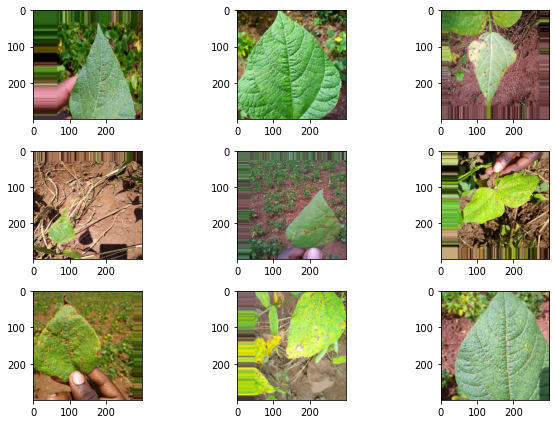

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 3, figsize=(9,6))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
          ax.imshow(img)
    plt.tight_layout()
    plt.show()
plotImages(training_images[:12])  # Plot 12 images


In [ ]:
callbacks= myCallback()

In [ ]:
# Build the Model

model= tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),padding='same', input_shape=(300,300,3), activation ='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            
                            tf.keras.layers.Conv2D(128,(3,3),padding='same', activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            #tf.keras.layers.Dropout(0.4),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(3, activation='softmax')

                            ])

In [ ]:
#Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Note that SPARSE CATEGORICAL works with integer categoricalvariable, if you do not specify Softmax, then we should add (from_logits=True)

In [ ]:
EPOCHS=50
#Fit the model
history = model.fit(train_datagen, 
          epochs= EPOCHS,
          validation_data = valid_datagen,
          callbacks = [callbacks])

Epoch 1/50
9/9 [==============================] - 233s 25s/step - loss: 4.3026 - accuracy: 0.3409 - val_loss: 1.0548 - val_accuracy: 0.4586
Epoch 2/50
9/9 [==============================] - 26s 3s/step - loss: 1.0544 - accuracy: 0.3867 - val_loss: 0.8863 - val_accuracy: 0.5338
Epoch 3/50
9/9 [==============================] - 26s 3s/step - loss: 0.9019 - accuracy: 0.5746 - val_loss: 1.7059 - val_accuracy: 0.3609
Epoch 4/50
9/9 [==============================] - 26s 3s/step - loss: 0.9431 - accuracy: 0.5545 - val_loss: 0.6929 - val_accuracy: 0.7143
Epoch 5/50
9/9 [==============================] - 26s 3s/step - loss: 0.7841 - accuracy: 0.6648 - val_loss: 0.6947 - val_accuracy: 0.7068
Epoch 6/50
9/9 [==============================] - 26s 3s/step - loss: 0.7329 - accuracy: 0.6669 - val_loss: 0.8565 - val_accuracy: 0.6391
Epoch 7/50
9/9 [==============================] - 26s 3s/step - loss: 0.7319 - accuracy: 0.6554 - val_loss: 0.6072 - val_accuracy: 0.7669
Epoch 8/50
9/9 [================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 512)       590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 700928)            0

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs_range= range(EPOCHS)

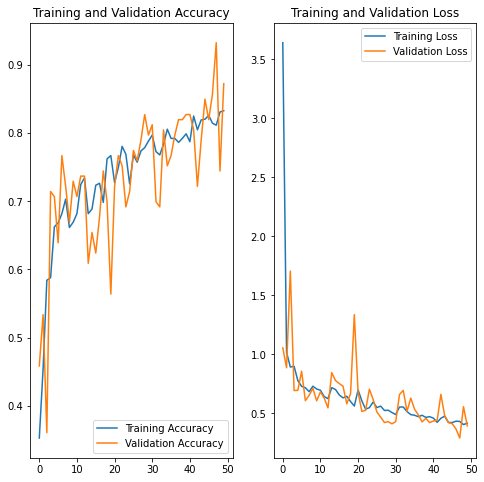

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


In [ ]:
#Evaluate Accuracy
test_loss, test_accuracy  = model.evaluate(test_datagen, batch_size=128)

print('Accuracy on test dataset:', test_accuracy)

1/1 [==============================] - 1s 1s/step - loss: 0.4675 - accuracy: 0.8359
Accuracy on test dataset: 0.8359375


In [ ]:
_, test_labels = next(test_datagen)
predicts =np.argmax(model.predict(test_datagen), axis=-1)
labels= test_labels.astype(int)
print(list((labels)))
print(list(predicts))
print(len(predicts))

[2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0]
[2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0]
128


In [ ]:
classes= ['Healthy', 'Angular Leaf', 'Rust Bean']

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f24cbd82b38>)

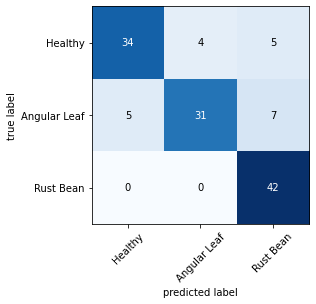

In [ ]:
#Confusion Matrix
!pip install mlxtend --upgrade --no-deps 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat =confusion_matrix(test_labels, predicts)
plot_confusion_matrix(conf_mat=mat, class_names= classes)

In [ ]:
#Few more questions:

# I would like to print the images with prediction chart, the one in similar in the Bean_Image_Classificitions2.ipynb file.

# How can I do that?